In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
import missingno as msno
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('/kaggle/input/train-csv/train.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


<Axes: >

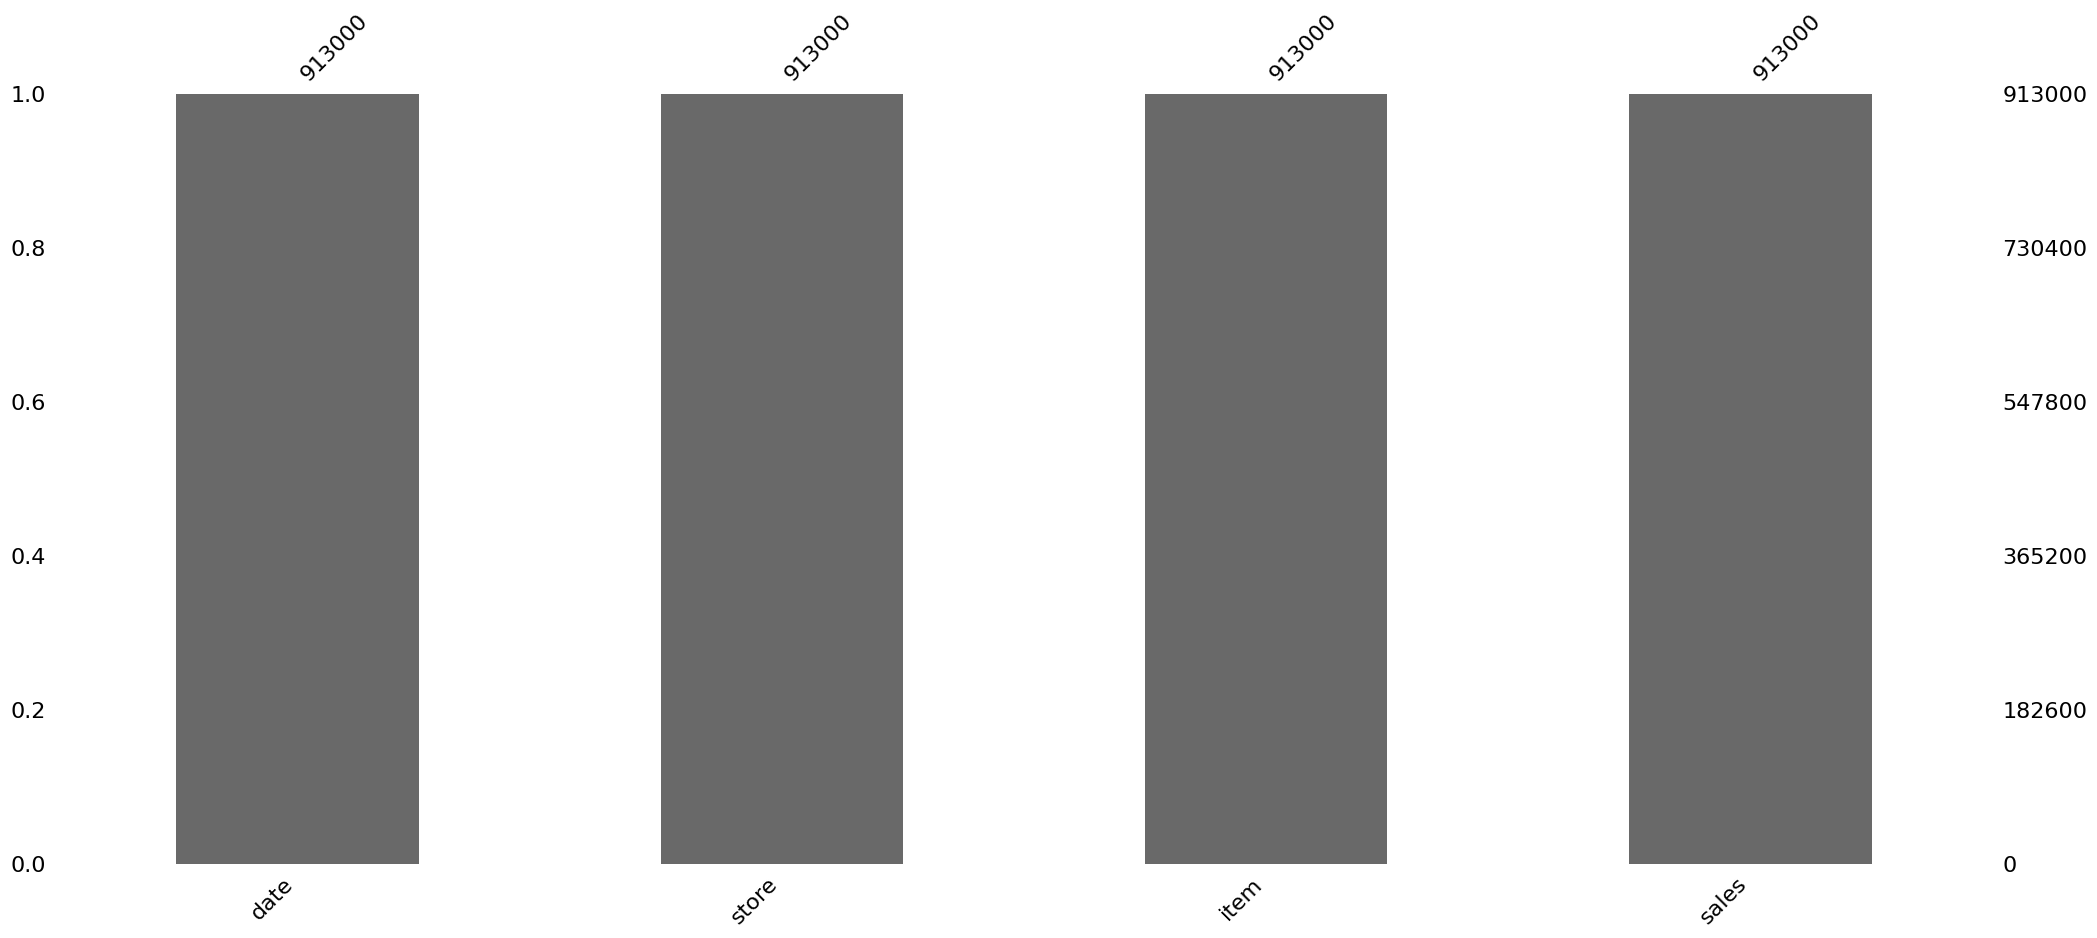

In [38]:

msno.bar(df)

In [39]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [40]:
df.duplicated().sum()

0

In [41]:
df.shape

(913000, 4)

In [42]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [43]:
parts = df["date"].str.split("-", n = 3, expand = True)
df["Year"]= parts[0].astype('int')
df["month"]= parts[1].astype('int')
df["day"]= parts[2].astype('int')
df.head()

,date,store,item,sales,Year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


In [44]:
from datetime import datetime

def weekend_or_weekday(year, month, day):
    d = datetime(year, month, day)
    return 1 if d.weekday() > 4 else 0

df['weekend'] = df.apply(lambda x: weekend_or_weekday(x['Year'], x['month'], x['day']), axis=1)



In [45]:
from datetime import date
import holidays

india_holidays = holidays.country_holidays('IN')
df['holidays'] = df['date'].apply(lambda x: 1 if india_holidays.get(x) else 0)

In [46]:
def which_day(year, month, day):
    return datetime(year, month, day).weekday()

df['weekday'] = df.apply(lambda x: which_day(x['Year'], x['month'], x['day']), axis=1)

In [47]:
df.drop(["date"] , axis = 1 , inplace = True)

In [48]:
df


,store,item,sales,Year,month,day,weekend,holidays,weekday
0,1,1,13,2013,1,1,0,0,1
1,1,1,11,2013,1,2,0,0,2
2,1,1,14,2013,1,3,0,0,3
3,1,1,13,2013,1,4,0,0,4
4,1,1,10,2013,1,5,1,0,5
...,...,...,...,...,...,...,...,...,...
912995,10,50,63,2017,12,27,0,0,2
912996,10,50,59,2017,12,28,0,0,3
912997,10,50,74,2017,12,29,0,0,4
912998,10,50,62,2017,12,30,1,0,5


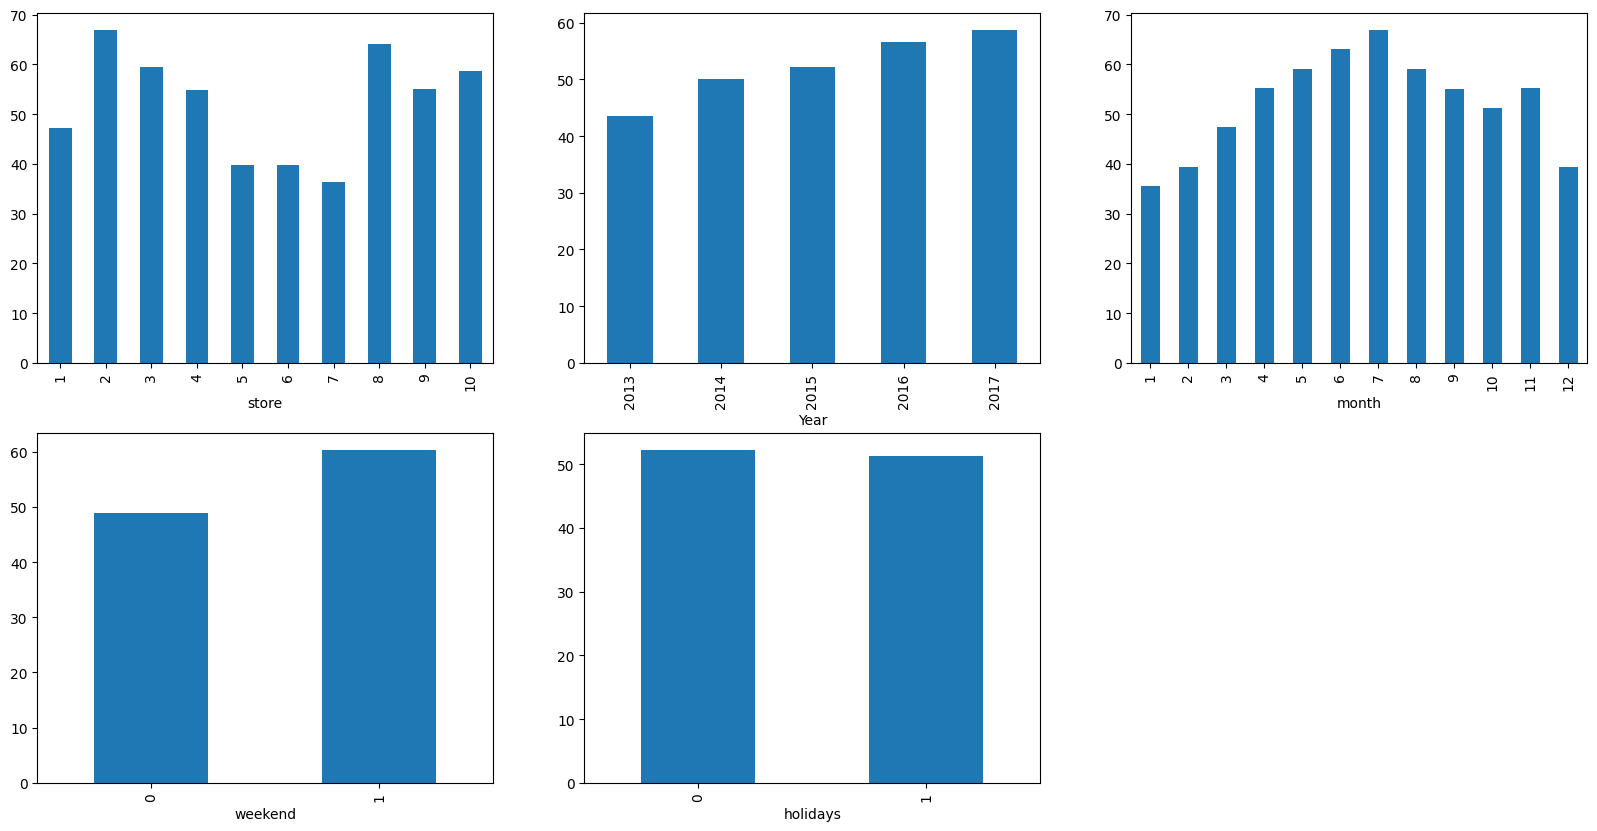

In [49]:
cols = ['store' , 'Year' , 'month' , 'weekend' , 'holidays']

plt.subplots(figsize=(20, 10))
for i , col in enumerate(cols):
    plt.subplot(2,3,i+1)
    df.groupby(col).mean()['sales'].plot(kind = 'bar')
plt.show()

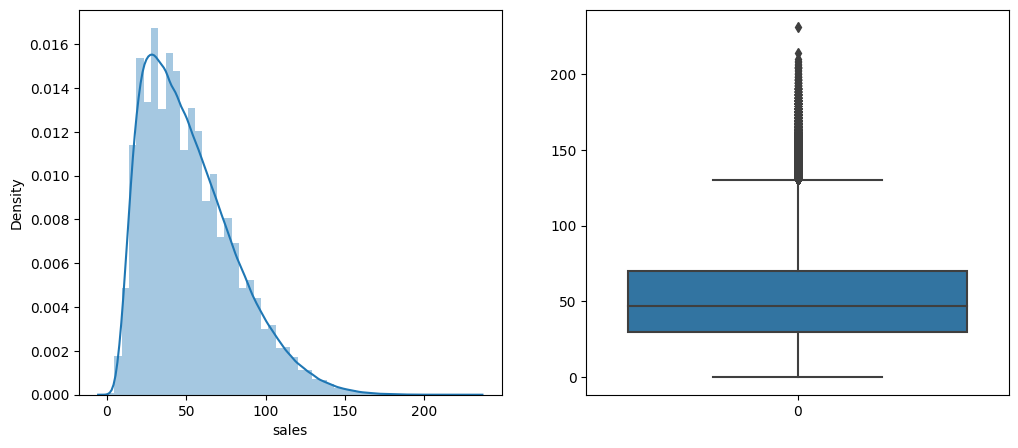

In [50]:


plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['sales'])

plt.subplot(1, 2, 2)
sns.boxplot(df['sales'])
plt.show()

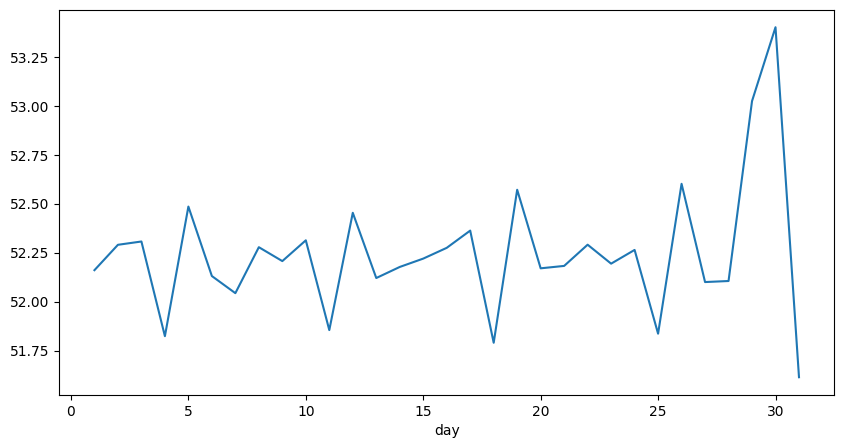

In [51]:
plt.figure(figsize=(10,5))
df.groupby('day').mean()['sales'].plot()
plt.show()

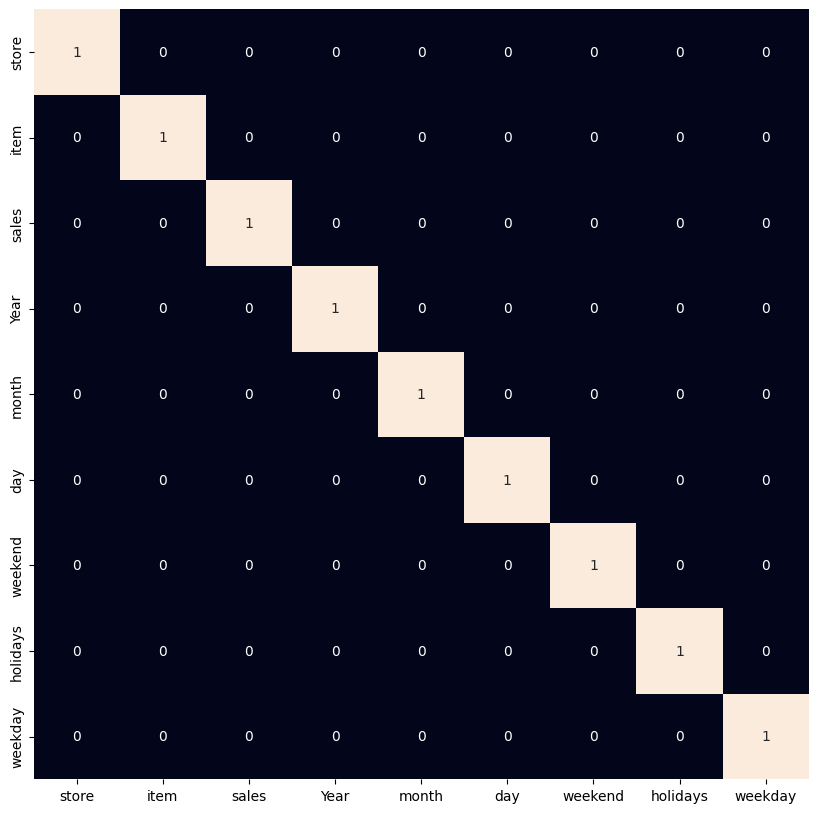

In [52]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()


In [53]:
X = df.drop(['sales', 'Year'], axis=1)
y = df['sales'].values


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.05,
                                                  random_state=22)
X_train.shape, X_test.shape

((867350, 7), (45650, 7))

In [54]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

# Training and evaluation
for model in models:
    model.fit(X_train, y_train)

    print(f'{model.__class__.__name__} :')

    train_preds = model.predict(X_train)
    print('Training Error :', mae(y_train, train_preds))

    val_preds = model.predict(X_test)
    print('Validation Error :', mae(y_test, val_preds))
    print()

LinearRegression :
Training Error : 22.44232673707498
Validation Error : 22.573236483464868

XGBRegressor :
Training Error : 7.04295860525826
Validation Error : 7.057277448723115

Lasso :
Training Error : 22.521946785280928
Validation Error : 22.649653102407292

Ridge :
Training Error : 22.44232683214846
Validation Error : 22.57323653877203

